In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.1.0


In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape


(60000, 28, 28)

In [12]:
len(train_labels)


60000

In [13]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape


(10000, 28, 28)

In [15]:
len(test_labels)


10000

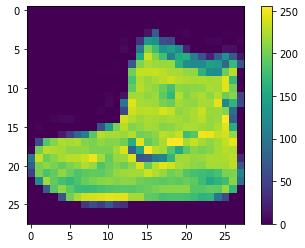

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

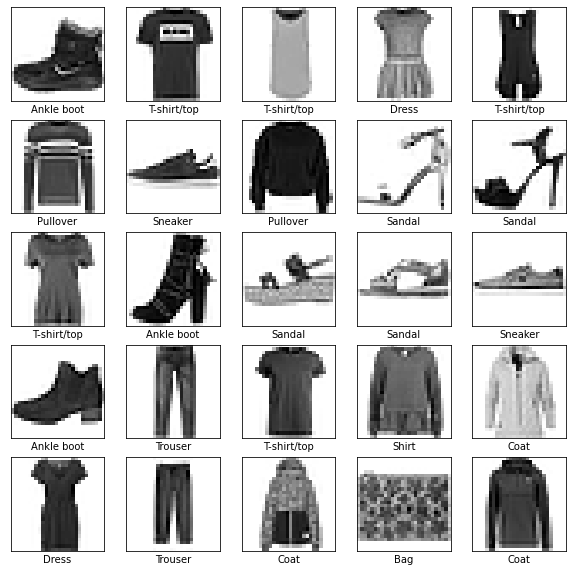

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=10 , batch_size =10, validation_split = 0.2  )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 282us/sample - loss: 0.5011 - accuracy: 0.8220 - val_loss: 0.4288 - val_accuracy: 0.8444
Epoch 2/10
48000/48000 [==============================] - 11s 230us/sample - loss: 0.3763 - accuracy: 0.8625 - val_loss: 0.3687 - val_accuracy: 0.8692
Epoch 3/10
48000/48000 [==============================] - 10s 210us/sample - loss: 0.3358 - accuracy: 0.8766 - val_loss: 0.3567 - val_accuracy: 0.8672
Epoch 4/10
48000/48000 [==============================] - 10s 208us/sample - loss: 0.3165 - accuracy: 0.8828 - val_loss: 0.3498 - val_accuracy: 0.8788
Epoch 5/10
48000/48000 [==============================] - 11s 221us/sample - loss: 0.2991 - accuracy: 0.8895 - val_loss: 0.3612 - val_accuracy: 0.8723
Epoch 6/10
48000/48000 [==============================] - 10s 206us/sample - loss: 0.2853 - accuracy: 0.8948 - val_loss: 0.3473 - val_accuracy: 0.8762
Epoch 7/10
48000/48000 [====================

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3799 - accuracy: 0.8727

Test accuracy: 0.8727


In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
predictions[0]


array([3.6130252e-12, 5.1351250e-12, 1.0415724e-11, 5.1107380e-15,
       2.4305425e-12, 2.8327559e-04, 9.5427234e-12, 2.1285764e-03,
       2.3712556e-09, 9.9758816e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]


9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

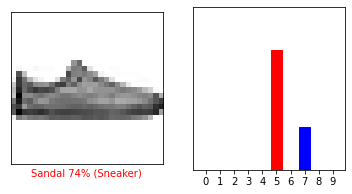

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

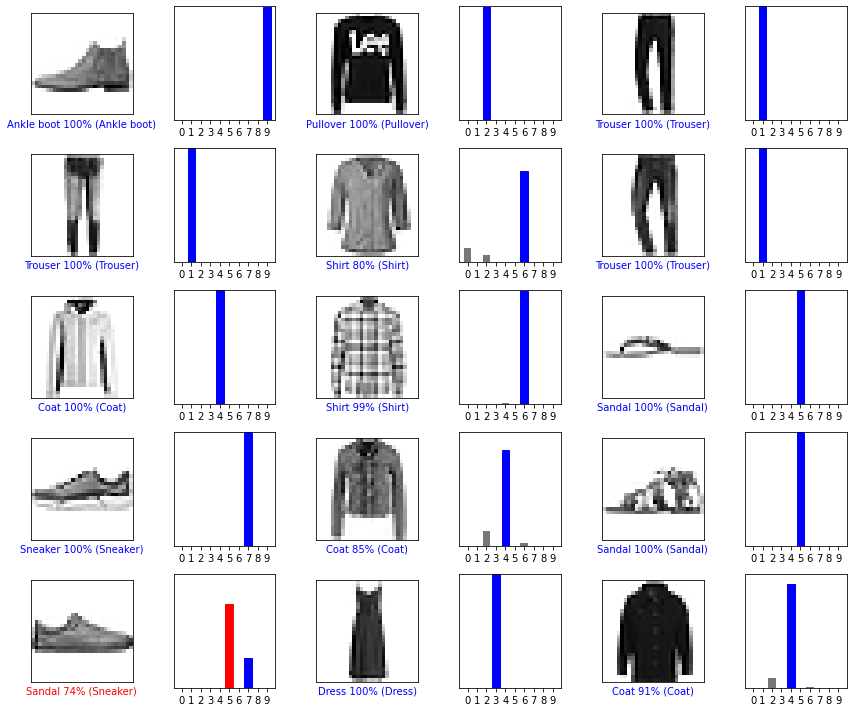

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[1.87879923e-05 1.73074929e-19 9.98939216e-01 2.26653959e-10
  8.25396681e-04 1.92342823e-15 2.16620087e-04 1.01592600e-28
  2.29755726e-09 1.05538986e-19]]


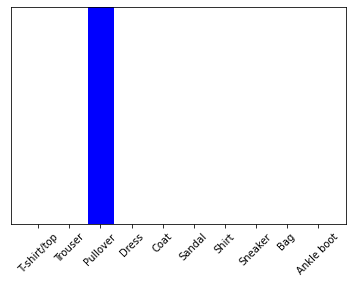

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2

In [37]:
help(model)


Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [38]:
history.history

{'loss': [0.501065848916187,
  0.3763322255546518,
  0.3358441310331303,
  0.3164770836387955,
  0.29908332635952317,
  0.2853017592333102,
  0.27193677631303825,
  0.26395535879077214,
  0.2532171794486249,
  0.24841833729215673],
 'accuracy': [0.822,
  0.8625417,
  0.87658334,
  0.8828125,
  0.8895417,
  0.89477086,
  0.8986458,
  0.90120834,
  0.905375,
  0.9079583],
 'val_loss': [0.42880759830547804,
  0.3686643563519465,
  0.35668720785043356,
  0.34978919774255096,
  0.36116775743069107,
  0.3472859237840506,
  0.3369259780268476,
  0.3467934428638546,
  0.36038485023813943,
  0.351437503342507],
 'val_accuracy': [0.8444167,
  0.86925,
  0.86716664,
  0.87875,
  0.87225,
  0.87616664,
  0.88191664,
  0.881,
  0.878,
  0.87866664]}

In [39]:
import matplotlib.pyplot as plt

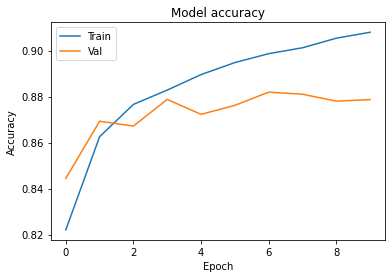

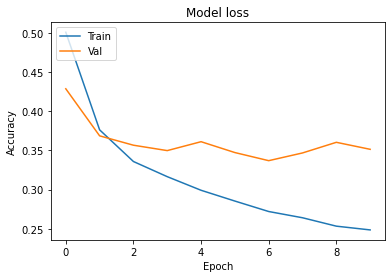

In [40]:
#plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


In [41]:
### confusion matrix

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred = model.predict_classes(test_images)

In [45]:
accuracy_score(test_labels,y_pred) #test_images, test_labels

0.8727

In [46]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x202f935afd0>)

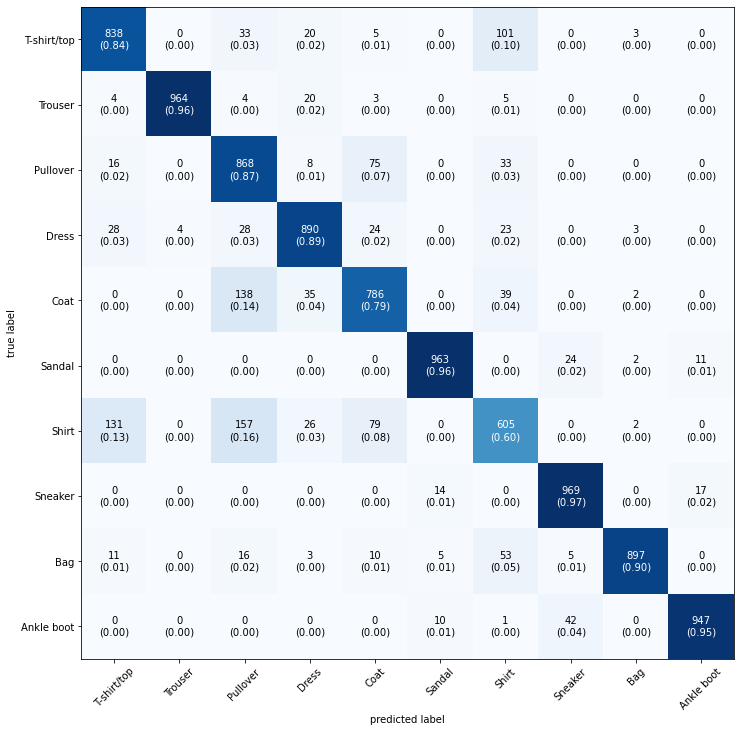

In [47]:
mat = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12,12), class_names = class_names, show_normed = True)